In [1]:
!pip install yellowbrick  
import numpy as np                       
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import DBSCAN
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import MiniBatchKMeans
from sklearn.mixture import GaussianMixture
from yellowbrick.cluster import KElbowVisualizer
from sklearn import metrics

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [111]:
df = pd.read_csv('/content/data.csv')

In [136]:
X = df.drop(["Country", "Year", "Status"], axis=1)

In [137]:
X.fillna(-999, inplace=True)

In [139]:
X

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [140]:

scaler = MinMaxScaler()
X = scaler.fit_transform(X)
pca = PCA(n_components=5)
pca.fit(X)
X_5 = pca.transform(X)
print(X_5)

[[-0.16755152 -0.12087992 -0.01177483  0.03692719 -0.06573999]
 [-0.16683961 -0.12272143 -0.01026368  0.02681713 -0.06527534]
 [-0.16897593 -0.12305961 -0.00985654  0.02577242 -0.0652004 ]
 ...
 [-0.16031629 -0.1342641  -0.00810431  0.05916249 -0.20753689]
 [-0.15616982 -0.13106979 -0.01046433  0.07713062 -0.29513107]
 [-0.15914863 -0.13355124 -0.00888827  0.06736067 -0.30087097]]


In [141]:
col = ['PC%s' % _ for _ in range(1, 6)]
pain_5 = pd.DataFrame(X_5, columns=col)
pain_5.head()

,PC1,PC2,PC3,PC4,PC5
0,-0.167552,-0.120880,-0.011775,0.036927,-0.065740
1,-0.166840,-0.122721,-0.010264,0.026817,-0.065275
2,-0.168976,-0.123060,-0.009857,0.025772,-0.065200
3,-0.171665,-0.123641,-0.008867,0.024469,-0.065436
4,-0.172878,-0.122919,-0.008209,0.025256,-0.071673


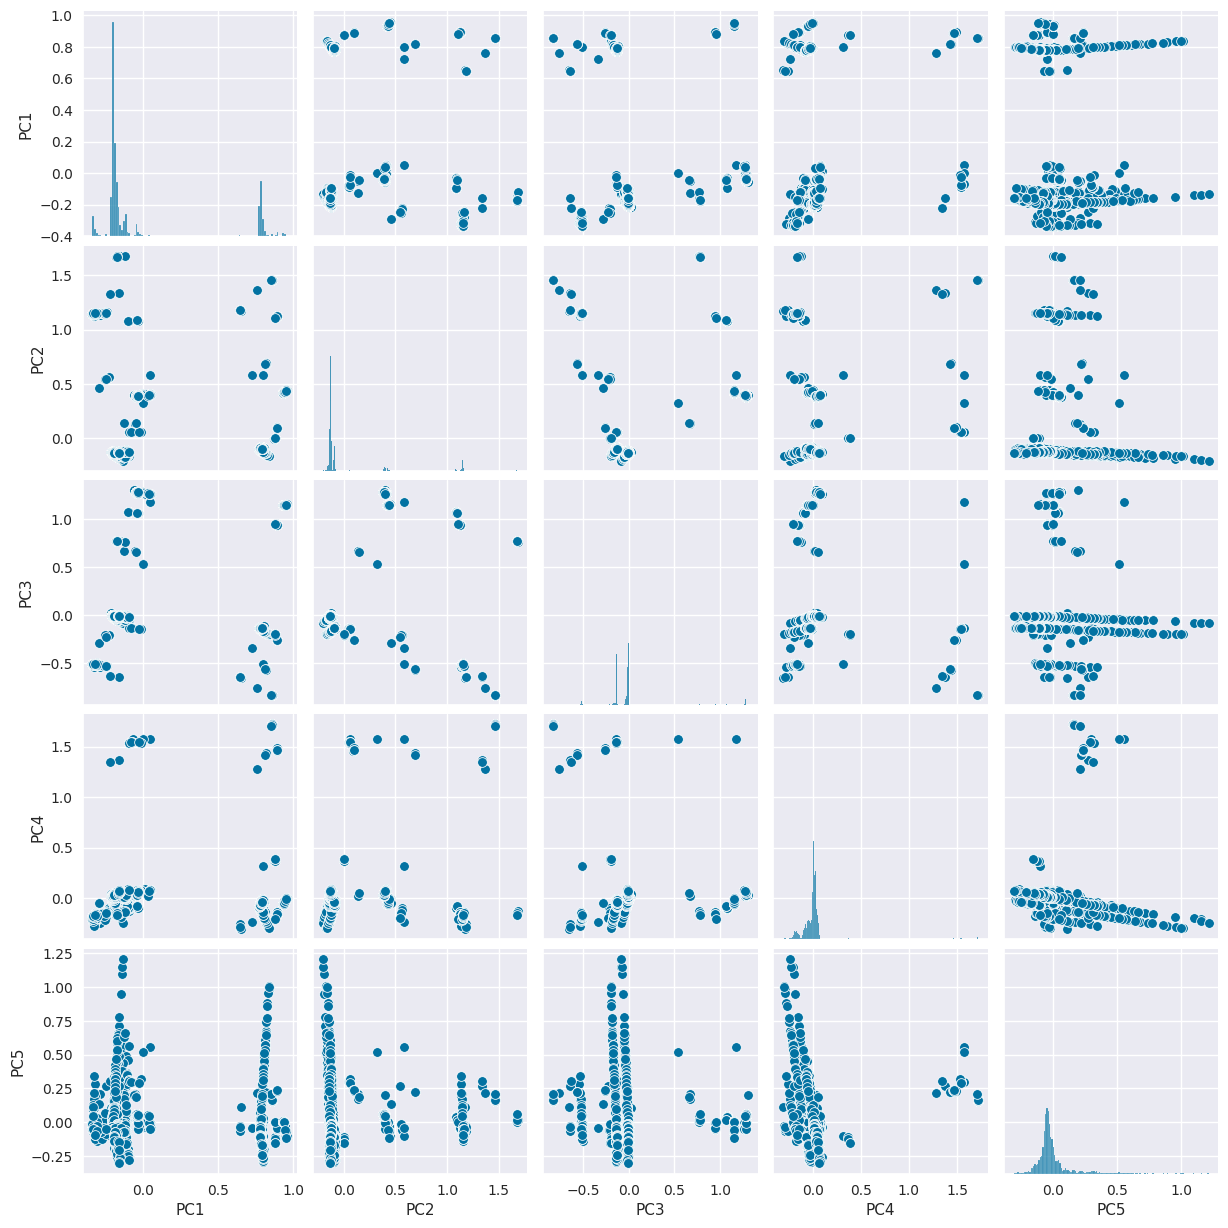

In [142]:
sns.pairplot(pain_5);

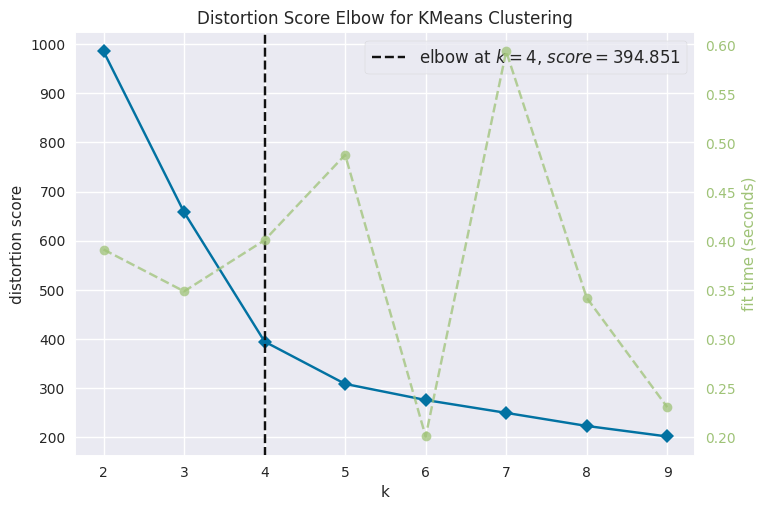

In [143]:
km = KMeans(random_state=0)
visualizer = KElbowVisualizer(km, k=(2, 10))
visualizer.fit(X)
visualizer.show();

In [144]:
kmeans = KMeans(n_clusters=4, random_state=0, n_init="auto").fit(X)
iris_km = pd.DataFrame(X_5, columns=col)
iris_km['species'] = kmeans.labels_
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [146]:
np.unique(kmeans.labels_)

array([0, 1, 2, 3], dtype=int32)

In [152]:
for i in np.unique(kmeans.labels_):
  print(np.count_nonzero(kmeans.labels_ == i))

2100
490
185
163


In [174]:
y = df[kmeans.labels_ == 1]

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
44,Algeria,2003,Developing,71.7,146.0,20,0.34,25.018523,NaN,15374,...,87.0,3.60,87.0,0.1,294.335560,3243514.0,6.3,6.1,0.663,11.5
45,Algeria,2002,Developing,71.6,145.0,20,0.36,148.511984,NaN,5862,...,86.0,3.73,86.0,0.1,1774.336730,3199546.0,6.3,6.2,0.653,11.1
46,Algeria,2001,Developing,71.4,145.0,20,0.23,147.986071,NaN,2686,...,89.0,3.84,89.0,0.1,1732.857979,31592153.0,6.4,6.3,0.644,10.9
47,Algeria,2000,Developing,71.3,145.0,21,0.25,154.455944,NaN,0,...,86.0,3.49,86.0,0.1,1757.177970,3118366.0,6.5,6.4,0.636,10.7
57,Angola,2006,Developing,47.7,381.0,90,5.84,25.086888,NaN,765,...,36.0,4.54,34.0,2.5,262.415149,2262399.0,9.8,9.7,0.439,7.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2917,Zambia,2004,Developing,47.9,578.0,36,2.46,8.369852,NaN,35,...,84.0,7.33,83.0,17.6,53.277222,11731746.0,7.2,7.1,0.456,10.5
2918,Zambia,2003,Developing,46.4,64.0,39,2.33,65.789974,NaN,881,...,85.0,8.18,83.0,18.2,429.158343,11421984.0,7.3,7.2,0.443,10.2
2919,Zambia,2002,Developing,45.5,69.0,41,2.44,54.043480,NaN,25036,...,85.0,6.93,84.0,18.4,377.135244,111249.0,7.4,7.3,0.433,10.0
2920,Zambia,2001,Developing,44.6,611.0,43,2.61,46.830275,NaN,16997,...,86.0,6.56,85.0,18.6,378.273624,1824125.0,7.4,7.4,0.424,9.8


In [ ]:
!pip install catboost
!pip install scikit-learn
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension

In [181]:
model = CatBoostClassifier(
    custom_loss=[metrics.Accuracy()],
    random_seed=42,
    logging_level='Silent'
)

train_pool = Pool(X, kmeans.labels_ == 3)

In [182]:
from catboost import CatBoostClassifier, Pool, metrics, cv
from sklearn.metrics import accuracy_score

model = CatBoostClassifier(iterations=50, random_seed=42, logging_level='Silent').fit(train_pool)
feature_importances = model.get_feature_importance(train_pool)
feature_names = df.columns
for score, name in sorted(zip(feature_importances, feature_names), reverse=True):
    print('{}: {}'.format(name, score))

Population: 44.81427727180279
 thinness  1-19 years: 26.396194352990836
Country: 3.4003455017608033
Hepatitis B: 2.492281506685541
 HIV/AIDS: 2.488162492073808
infant deaths: 2.4688210168516767
Life expectancy : 2.3702152657725355
Year: 2.258798289247457
under-five deaths : 1.8003340588114487
GDP: 1.6843333845262132
Alcohol: 1.6263772741756284
Total expenditure: 1.6186011481039204
Diphtheria : 1.2976975503069894
percentage expenditure: 1.2808064076172694
Adult Mortality: 1.2149728470198848
Measles : 0.9008135074119302
Status: 0.8023146821595198
Polio: 0.5768833020741048
 BMI : 0.507770140607654


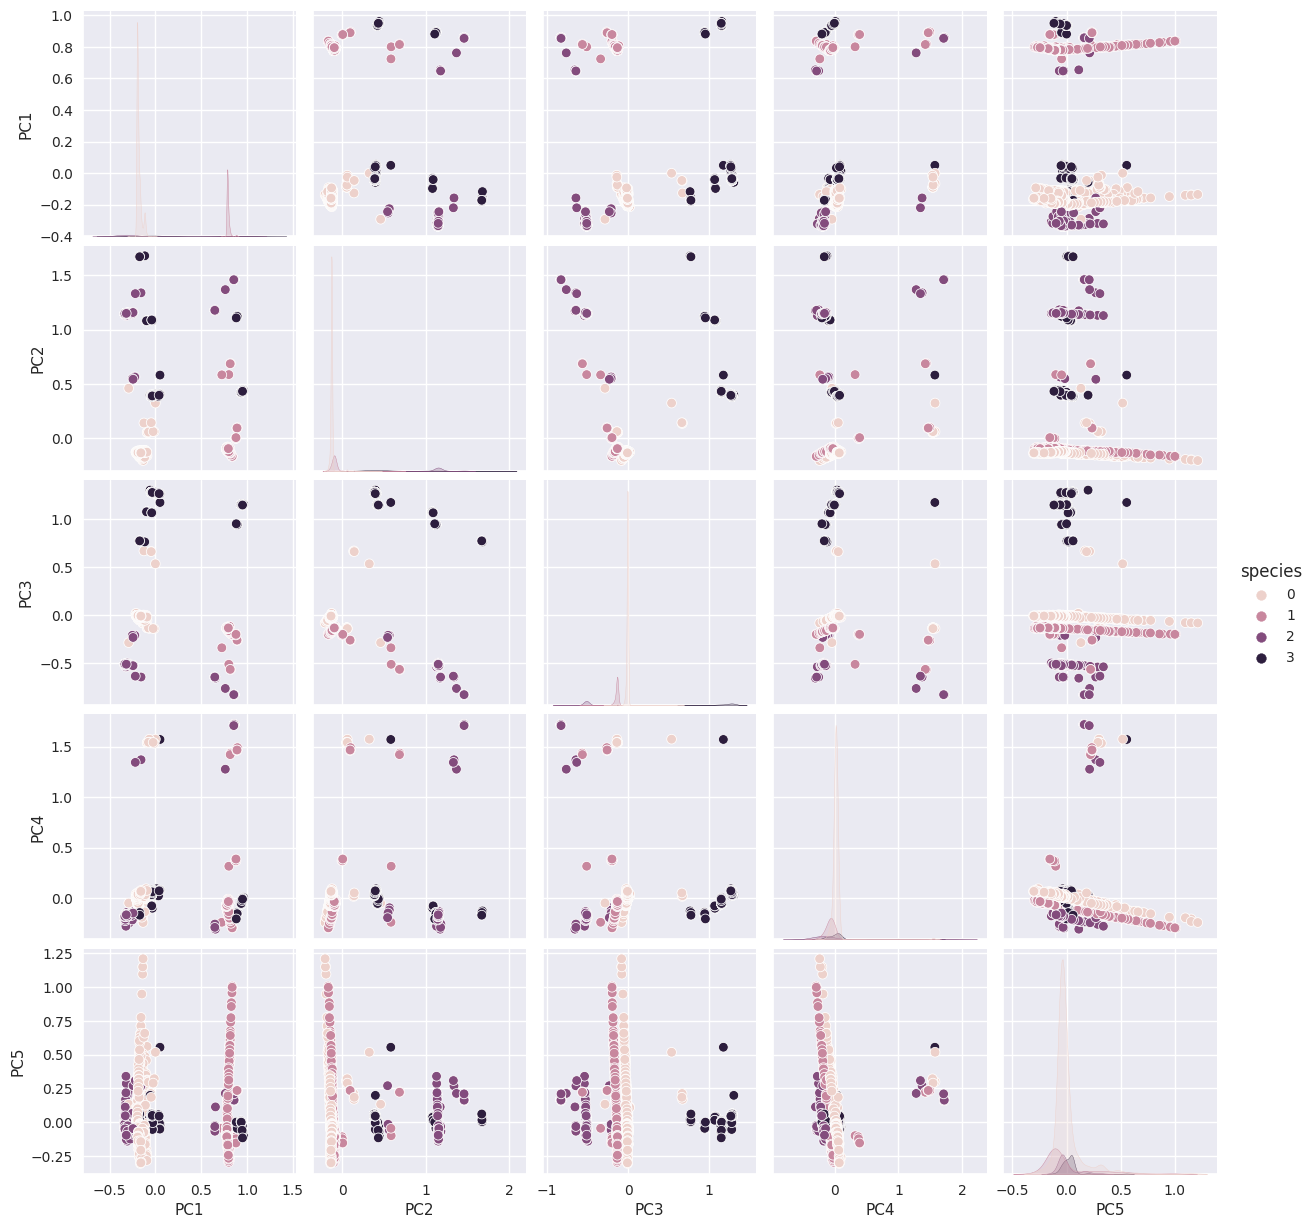

In [145]:
sns.pairplot(iris_km, hue="species");

In [153]:
af = AffinityPropagation(preference=-3, random_state=0).fit(X)
iris_af = pd.DataFrame(X_5, columns=col)
iris_af['species'] = af.labels_
af.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


array([ 1,  1,  1, ..., 34, 34, 34])

In [154]:
np.unique(af.labels_)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37])

In [160]:
for i in np.unique(af.labels_):
  print(i, (np.count_nonzero(af.labels_ == i)))

0 80
1 563
2 27
3 20
4 3
5 159
6 73
7 5
8 4
9 5
10 335
11 2
12 8
13 43
14 5
15 36
16 20
17 93
18 179
19 56
20 3
21 1
22 1
23 1
24 1
25 1
26 1
27 1
28 1
29 1
30 1
31 1
32 10
33 8
34 25
35 8
36 18
37 1139


In [161]:
db = DBSCAN(eps=0.3, min_samples=3).fit(X)
db.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [163]:
for i in np.unique(db.labels_):
  print(i, (np.count_nonzero(db.labels_ == i)))

-1 17
0 2071
1 158
2 466
3 9
4 93
5 26
6 14
7 17
8 7
9 6
10 4
11 4
12 4
13 3
14 7
15 3
16 3
17 11
18 10
19 5


In [184]:
model = CatBoostClassifier(
    custom_loss=[metrics.Accuracy()],
    random_seed=42,
    logging_level='Silent'
)

train_pool = Pool(X, af.labels_ == 5)

In [185]:
from catboost import CatBoostClassifier, Pool, metrics, cv
from sklearn.metrics import accuracy_score

model = CatBoostClassifier(iterations=50, random_seed=42, logging_level='Silent').fit(train_pool)
feature_importances = model.get_feature_importance(train_pool)
feature_names = df.columns
for score, name in sorted(zip(feature_importances, feature_names), reverse=True):
    print('{}: {}'.format(name, score))

Life expectancy : 70.25202637523506
 BMI : 7.020491706801514
infant deaths: 4.450838538109181
 thinness  1-19 years: 3.6400073494089504
Population: 3.0901420034396487
Adult Mortality: 3.0306800241469056
percentage expenditure: 1.1015545802231461
under-five deaths : 1.0527347883890505
 HIV/AIDS: 1.0117090482603084
Country: 0.9990544926024337
Total expenditure: 0.8897545188046956
GDP: 0.6293647159173312
Measles : 0.6063151988143575
Year: 0.5484073175917319
Diphtheria : 0.45914490152652127
Alcohol: 0.36375092201759146
Polio: 0.2864604730541673
Status: 0.2839033584622759
Hepatitis B: 0.28365968719515056
